In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [2]:
#Loading Data
data = pd.read_csv("/content/drive/MyDrive/AIConnect/Traffic_forecast/train.csv")
data.head(5)

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200101,0,83247,19128,2611,5161,1588,892,32263,1636,7938,1894,14957,3527,11174,2930,8640,14175,2035,5231,18492,48520,15393,16628,8804,2790,38657,1311,3482,11299,7072,1176,3810,748,3920,2133,3799
1,20200101,1,89309,19027,3337,5502,1650,1043,35609,1644,9896,1967,14682,3420,13884,3062,8349,15654,2417,5483,15283,57904,15834,19785,8483,3381,45759,1162,3849,13180,8771,1283,3763,782,3483,2057,4010
2,20200101,2,66611,14710,2970,4631,1044,921,26821,1104,9343,1838,11120,3587,17141,3255,7025,12520,1859,5058,14327,53876,13866,24501,8167,2670,27425,768,2299,7986,5426,1536,3229,491,2634,1526,3388
3,20200101,3,53290,13753,2270,4242,1021,790,21322,909,10009,1630,9836,3842,20715,2661,7226,9821,1724,4863,12787,51615,13528,28695,9459,2325,18893,632,1716,5703,3156,1104,2882,431,2488,1268,3686
4,20200101,4,52095,17615,2406,3689,1840,922,22711,1354,15497,1264,10668,4559,28308,2894,8201,9038,960,5166,11479,47424,18156,26977,10944,3583,18135,875,2421,5816,2933,1206,2433,499,2952,1927,5608


In [3]:
df = data.copy()
df.rename(columns = {'날짜' : 'DateTime'}, inplace = True)
df.rename(columns = {'시간' : 'Hour'}, inplace = True)
df['DateTime'] = df['DateTime'].astype(str)
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['DateTime'] = df['DateTime'] + pd.to_timedelta(df['Hour'], unit='h')
df.drop('Hour', axis='columns', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  3279 non-null   datetime64[ns]
 1   10        3279 non-null   int64         
 2   100       3279 non-null   int64         
 3   101       3279 non-null   int64         
 4   120       3279 non-null   int64         
 5   121       3279 non-null   int64         
 6   140       3279 non-null   int64         
 7   150       3279 non-null   int64         
 8   160       3279 non-null   int64         
 9   200       3279 non-null   int64         
 10  201       3279 non-null   int64         
 11  251       3279 non-null   int64         
 12  270       3279 non-null   int64         
 13  300       3279 non-null   int64         
 14  301       3279 non-null   int64         
 15  351       3279 non-null   int64         
 16  352       3279 non-null   int64         
 17  370       3279

In [4]:
df_10 = df[['DateTime', '10']] # 10 번 도로가 가장 큰 교통량을 가지므로 일단 이것부터 조져보자

In [5]:
df_10.head(5)

,DateTime,10
0,2020-01-01 00:00:00,83247
1,2020-01-01 01:00:00,89309
2,2020-01-01 02:00:00,66611
3,2020-01-01 03:00:00,53290
4,2020-01-01 04:00:00,52095


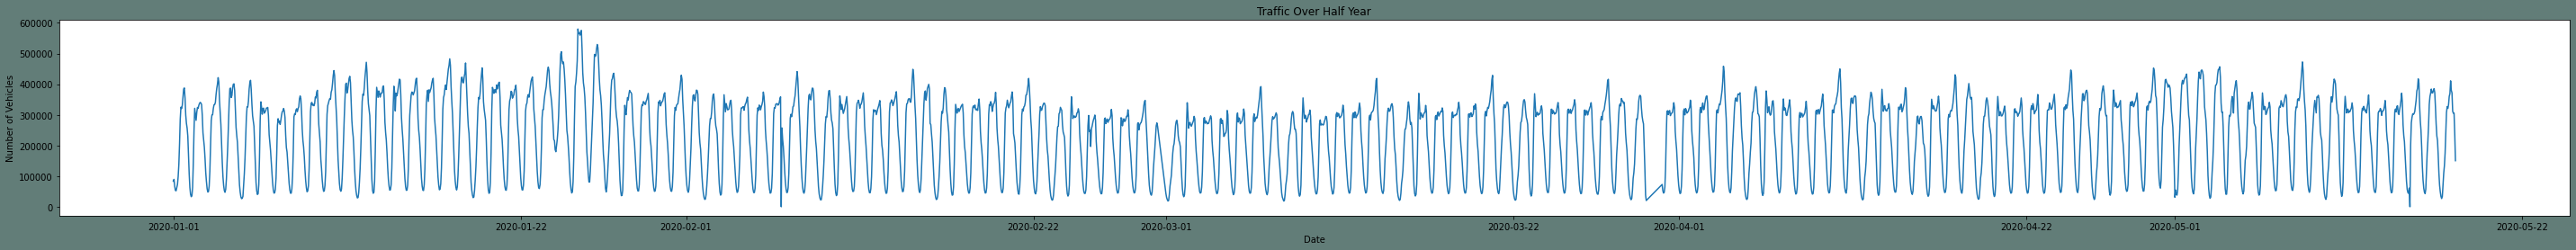

In [6]:
# 클릭하면 커짐
plt.figure(figsize=(50, 4),facecolor="#627D78")
Time_series=sns.lineplot(x=df_10['DateTime'],y="10", data=df_10)
Time_series.set_title("Traffic Over Half Year")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")
plt.show()

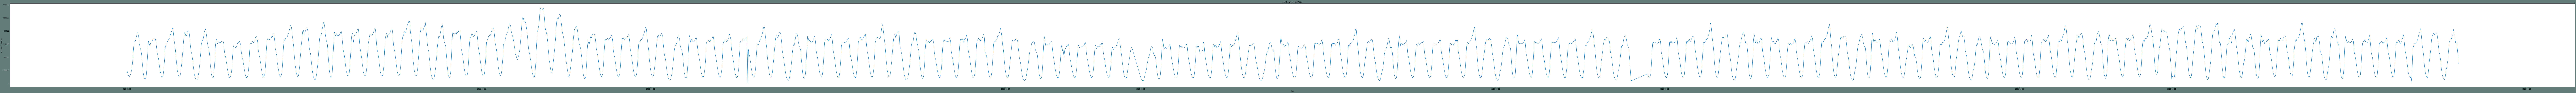

In [7]:
# 클릭하면 커짐
plt.figure(figsize=(300,10),facecolor="#627D78")
Time_series=sns.lineplot(x=df_10['DateTime'],y="10", data=df_10)
Time_series.set_title("Traffic Over Half Year")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")
plt.show()

In [8]:
df_10["Month"]= df_10['DateTime'].dt.month
df_10["Date_no"]= df_10['DateTime'].dt.day
df_10["Hour"]= df_10['DateTime'].dt.hour
df_10["Day"]= df_10.DateTime.dt.strftime("%A")
df_10.head()

,DateTime,10,Month,Date_no,Hour,Day
0,2020-01-01 00:00:00,83247,1,1,0,Wednesday
1,2020-01-01 01:00:00,89309,1,1,1,Wednesday
2,2020-01-01 02:00:00,66611,1,1,2,Wednesday
3,2020-01-01 03:00:00,53290,1,1,3,Wednesday
4,2020-01-01 04:00:00,52095,1,1,4,Wednesday


In [9]:
df_10.head(100)

,DateTime,10,Month,Date_no,Hour,Day
0,2020-01-01 00:00:00,83247,1,1,0,Wednesday
1,2020-01-01 01:00:00,89309,1,1,1,Wednesday
2,2020-01-01 02:00:00,66611,1,1,2,Wednesday
3,2020-01-01 03:00:00,53290,1,1,3,Wednesday
4,2020-01-01 04:00:00,52095,1,1,4,Wednesday
...,...,...,...,...,...,...
95,2020-01-04 23:00:00,113008,1,4,23,Saturday
96,2020-01-05 00:00:00,71491,1,5,0,Sunday
97,2020-01-05 01:00:00,47490,1,5,1,Sunday
98,2020-01-05 02:00:00,32479,1,5,2,Sunday


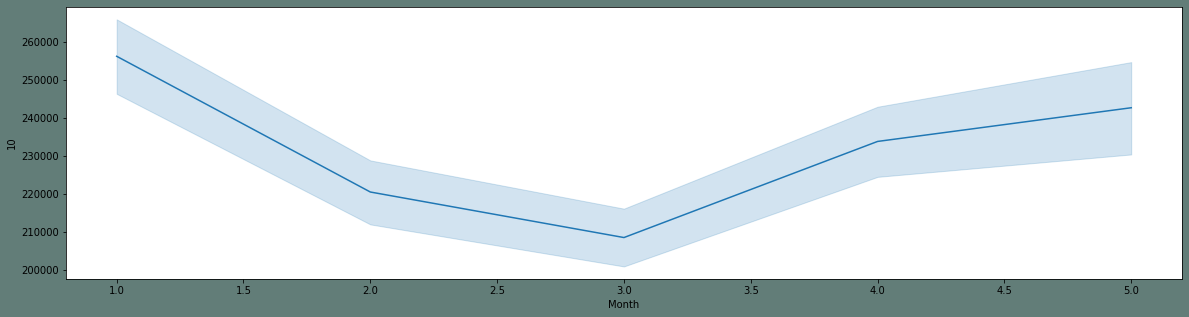

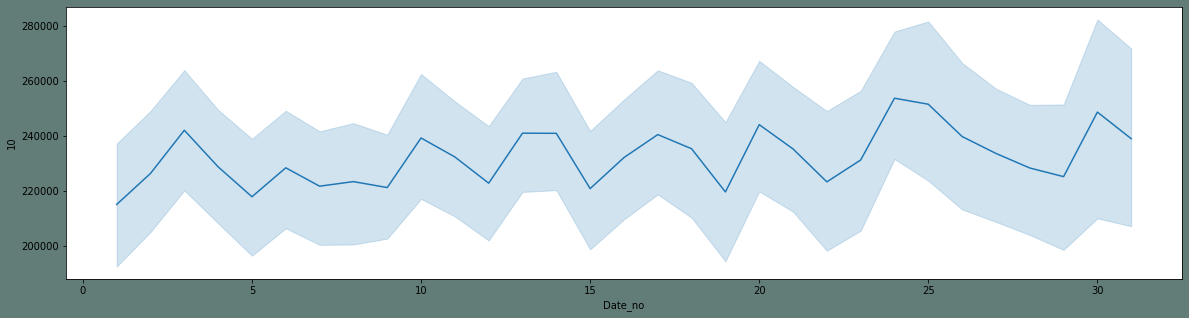

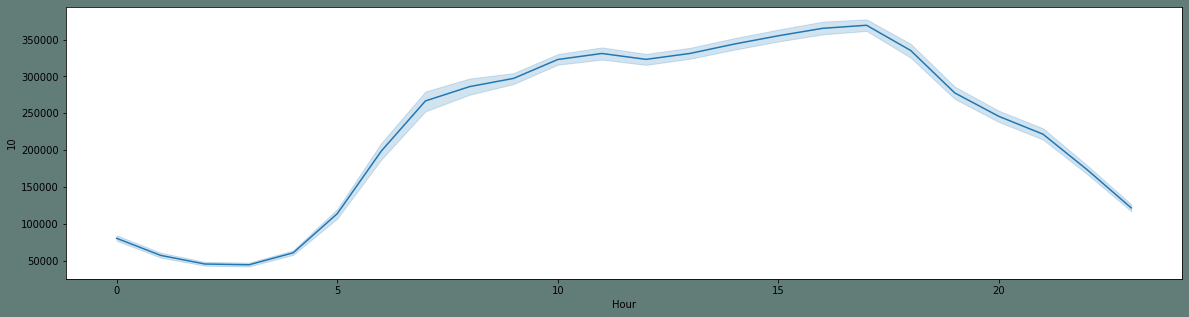

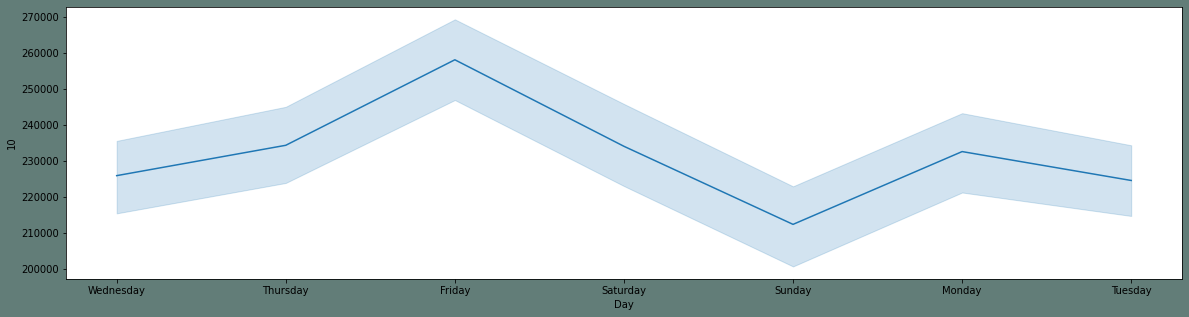

In [10]:
new_features = ["Month", "Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize=(20,5),facecolor="#627D78")
    ax=sns.lineplot(x=df_10[i],y="10",data=df_10)

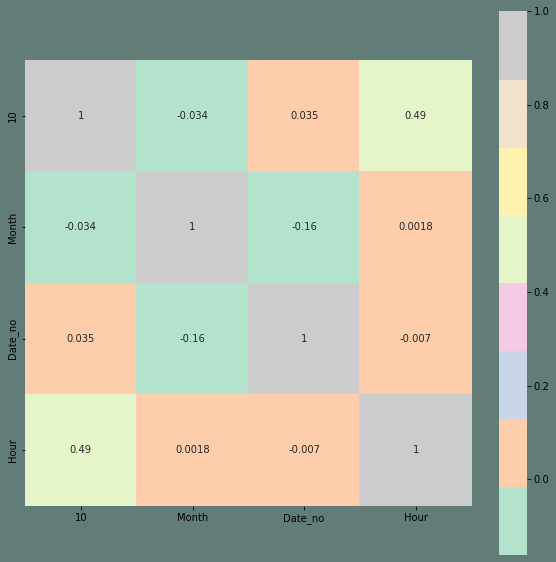

In [11]:
corrmat = df_10.corr()
plt.subplots(figsize=(10, 10),facecolor="#627D78")
sns.heatmap(corrmat,cmap= "Pastel2",annot=True,square=True, )

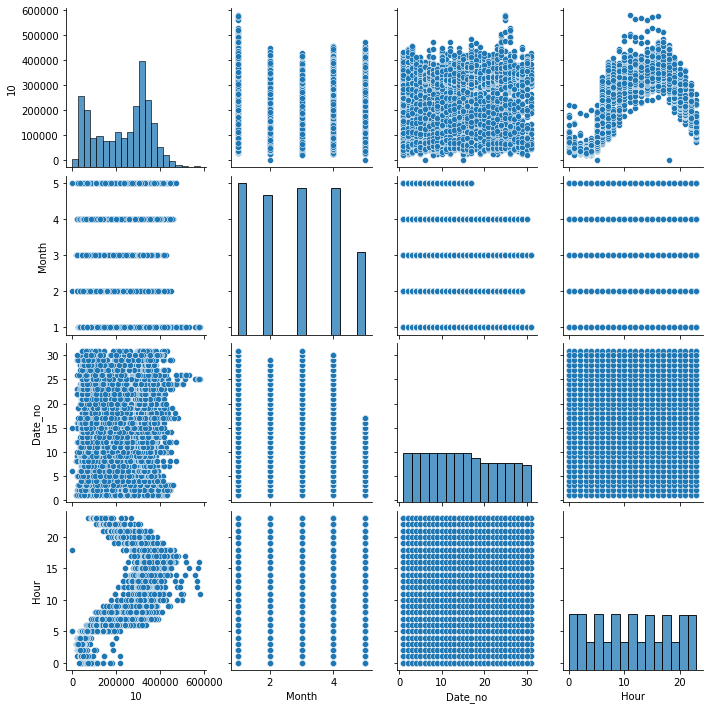

In [12]:
sns.pairplot(data=df_10) # 뭔지 모르겠는데 그냥 해봄 ..